<a href="https://colab.research.google.com/github/matchbou/Public/blob/master/LogisticRegForNonLinear20190709aa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# https://www.haya-programming.com/entry/2019/07/08/042121 
# 非線形がなんだ！　ロジスティック回帰＋多項式でやってやる！

In [0]:
!apt-get -qq install -y graphviz && pip install -q pydot
import pydot

In [0]:
def main(X, y, model, figname):
    model.fit(X, y)
    
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    plt.scatter(X[:, 0], X[:, 1], c=y, 
                cmap=cm_bright, edgecolors='k')

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    Z = Z.reshape(xx.shape)

    cm = plt.cm.RdBu
    plt.contourf(xx, yy, Z, cmap=cm, alpha=.2)
    plt.savefig(figname)

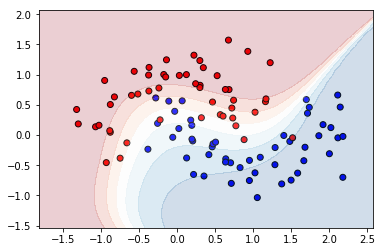

In [4]:
#moons
#moonsくらいならすぐできます。

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

def main(X, y, model, figname):
    model.fit(X, y)
    
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    plt.scatter(X[:, 0], X[:, 1], c=y, 
                cmap=cm_bright, edgecolors='k')

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    Z = Z.reshape(xx.shape)

    cm = plt.cm.RdBu
    plt.contourf(xx, yy, Z, cmap=cm, alpha=.2)
    plt.savefig(figname)

if __name__ == "__main__":
    X, y = make_moons(noise=0.3, random_state=0)

    pf = PolynomialFeatures(degree=4, include_bias=False)
    lr = LogisticRegression(solver="lbfgs")
    model = Pipeline([("pf", pf), ("lr", lr)])    

main(X, y, model, "fig1.png")

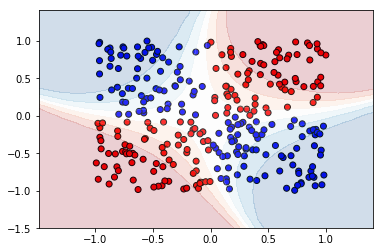

In [5]:
#XOR
#2次ですでにabが入るので、できて当然。

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

def main(X, y, model, figname):
    model.fit(X, y)
    
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    plt.scatter(X[:, 0], X[:, 1], c=y, 
                cmap=cm_bright, edgecolors='k')

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    Z = Z.reshape(xx.shape)

    cm = plt.cm.RdBu
    plt.contourf(xx, yy, Z, cmap=cm, alpha=.2)
    plt.savefig(figname)

def make_xor():
    np.random.seed(0)
    x = np.random.uniform(-1, 1, 300)
    y = np.random.uniform(-1, 1, 300)
    target = np.logical_xor(x > 0, y > 0)
    return np.c_[x, y], target

if __name__ == "__main__":
    X, y = make_xor()

    pf = PolynomialFeatures(degree=5, include_bias=False)
    lr = LogisticRegression(solver="lbfgs")
    model = Pipeline([("pf", pf), ("lr", lr)])    

main(X, y, model, "fig2.png")

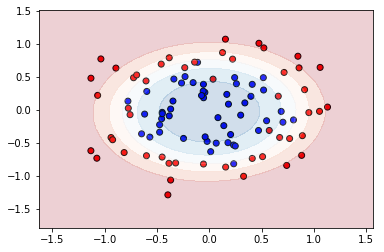

In [6]:
#circles-1
#円形のデータも実はきれいに分類できます。しかもたった2次で。

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_circles
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

def main(X, y, model, figname):
    model.fit(X, y)
    
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    plt.scatter(X[:, 0], X[:, 1], c=y, 
                cmap=cm_bright, edgecolors='k')

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    Z = Z.reshape(xx.shape)

    cm = plt.cm.RdBu
    plt.contourf(xx, yy, Z, cmap=cm, alpha=.2)
    plt.savefig(figname)

if __name__ == "__main__":
    X, y = make_circles(noise=0.2, factor=0.5, random_state=1)

    pf = PolynomialFeatures(degree=2, include_bias=False)
    lr = LogisticRegression(solver="lbfgs")
    model = Pipeline([("pf", pf), ("lr", lr)])    

main(X, y, model, "fig3.png")

In [7]:
!pip install dtreeviz

In [0]:
#circles-2
#これについてはにわかには信じがたかったので、決定木で可視化してみました。
import matplotlib.font_manager

from sklearn.datasets import make_circles
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier
from dtreeviz.trees import dtreeviz

def main():
    X, y = make_circles(noise=0.2, factor=0.5, random_state=1)
    pf = PolynomialFeatures(degree=2, include_bias=False)
    X_pf = pf.fit_transform(X)
    feature_names = ["x", "y", "x^2", "xy", "y^2"]

    dtc = DecisionTreeClassifier(max_depth=4)
    dtc.fit(X_pf, y)

    viz = dtreeviz(dtc, X_train=X_pf, y_train=y, 
                   feature_names=feature_names, target_name="",
                   class_names=["outer", "center"])
    viz.save("dtc.svg")

if __name__ == "__main__":
    main()


In [14]:
!ls ./

dtc  dtc.svg  fig1.png	fig2.png  fig3.png  sample_data


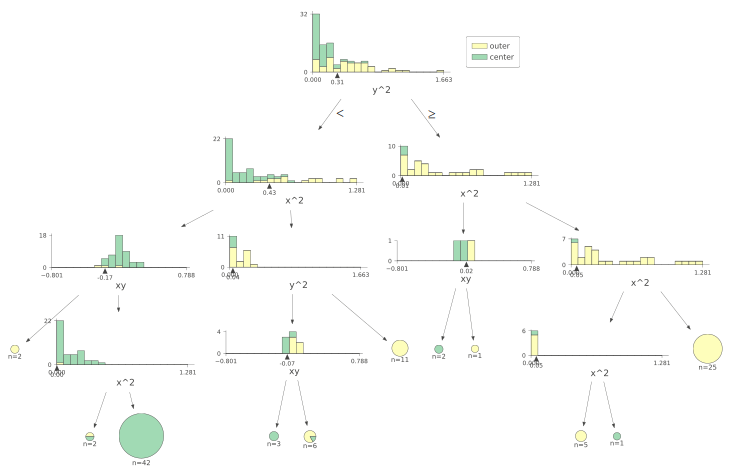

In [16]:
from IPython.display import *
display_svg(SVG("dtc.svg"))
